<a href="https://colab.research.google.com/github/Johnnyyy24/Dual-Thrust-Strategy-on-Bitcoin-/blob/main/BTC%20x%20Dual%20Thrust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd 
import datetime
from tqdm import tqdm, trange

In [2]:
price = requests.get('https://ftx.com/api/markets/BTC/USDT/candles?resolution=900&start_time=1609462800').json()
price = pd.DataFrame(price['result'])
price.drop(['time'], axis = 1, inplace=True)
price

,startTime,open,high,low,close,volume
0,2021-08-10T13:00:00+00:00,45933.0,46013.0,45791.0,45899.0,1.028107e+06
1,2021-08-10T13:15:00+00:00,45899.0,45962.0,45808.0,45912.0,1.707862e+06
2,2021-08-10T13:30:00+00:00,45912.0,46101.0,45460.0,45509.0,3.253730e+06
3,2021-08-10T13:45:00+00:00,45509.0,45620.0,45349.0,45534.0,3.747990e+06
4,2021-08-10T14:00:00+00:00,45534.0,45653.0,45355.0,45653.0,7.109730e+05
...,...,...,...,...,...,...
1495,2021-08-26T02:45:00+00:00,48715.0,48813.0,48691.0,48697.0,2.938263e+05
1496,2021-08-26T03:00:00+00:00,48697.0,48723.0,48223.0,48269.0,1.576403e+06
1497,2021-08-26T03:15:00+00:00,48269.0,48296.0,48067.0,48102.0,8.834259e+05
1498,2021-08-26T03:30:00+00:00,48102.0,48196.0,47927.0,48016.0,1.881950e+06


In [3]:
!pip install yfinance
import yfinance as yf
BTC = yf.Ticker("BTC-USD")

     |████████████████████████████████| 6.3 MB 6.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=cf426f8ef3ca7e2c5c39491902e35ccd9eb4a922afd956dca3233d57721e4f15
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [33]:
BTC.history(period='60d',interval='15m')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-06-27 00:00:00+01:00,31798.523438,31956.882812,31692.707031,31897.351562,219041792,0,0
2021-06-27 00:15:00+01:00,31930.945312,31930.945312,31758.587891,31790.275391,2293760,0,0
2021-06-27 00:30:00+01:00,31778.562500,31936.191406,31764.738281,31936.191406,159797248,0,0
2021-06-27 00:45:00+01:00,31884.902344,32186.277344,31858.671875,32186.277344,225325056,0,0
2021-06-27 01:00:00+01:00,32287.523438,32485.554688,32071.757812,32485.554688,278499328,0,0
...,...,...,...,...,...,...,...
2021-08-25 05:30:00+01:00,47999.304688,48093.144531,47999.304688,48093.144531,16375808,0,0
2021-08-25 05:45:00+01:00,48064.648438,48127.132812,47928.750000,48015.910156,26107904,0,0
2021-08-25 06:00:00+01:00,48057.421875,48141.316406,48057.421875,48141.316406,49461248,0,0


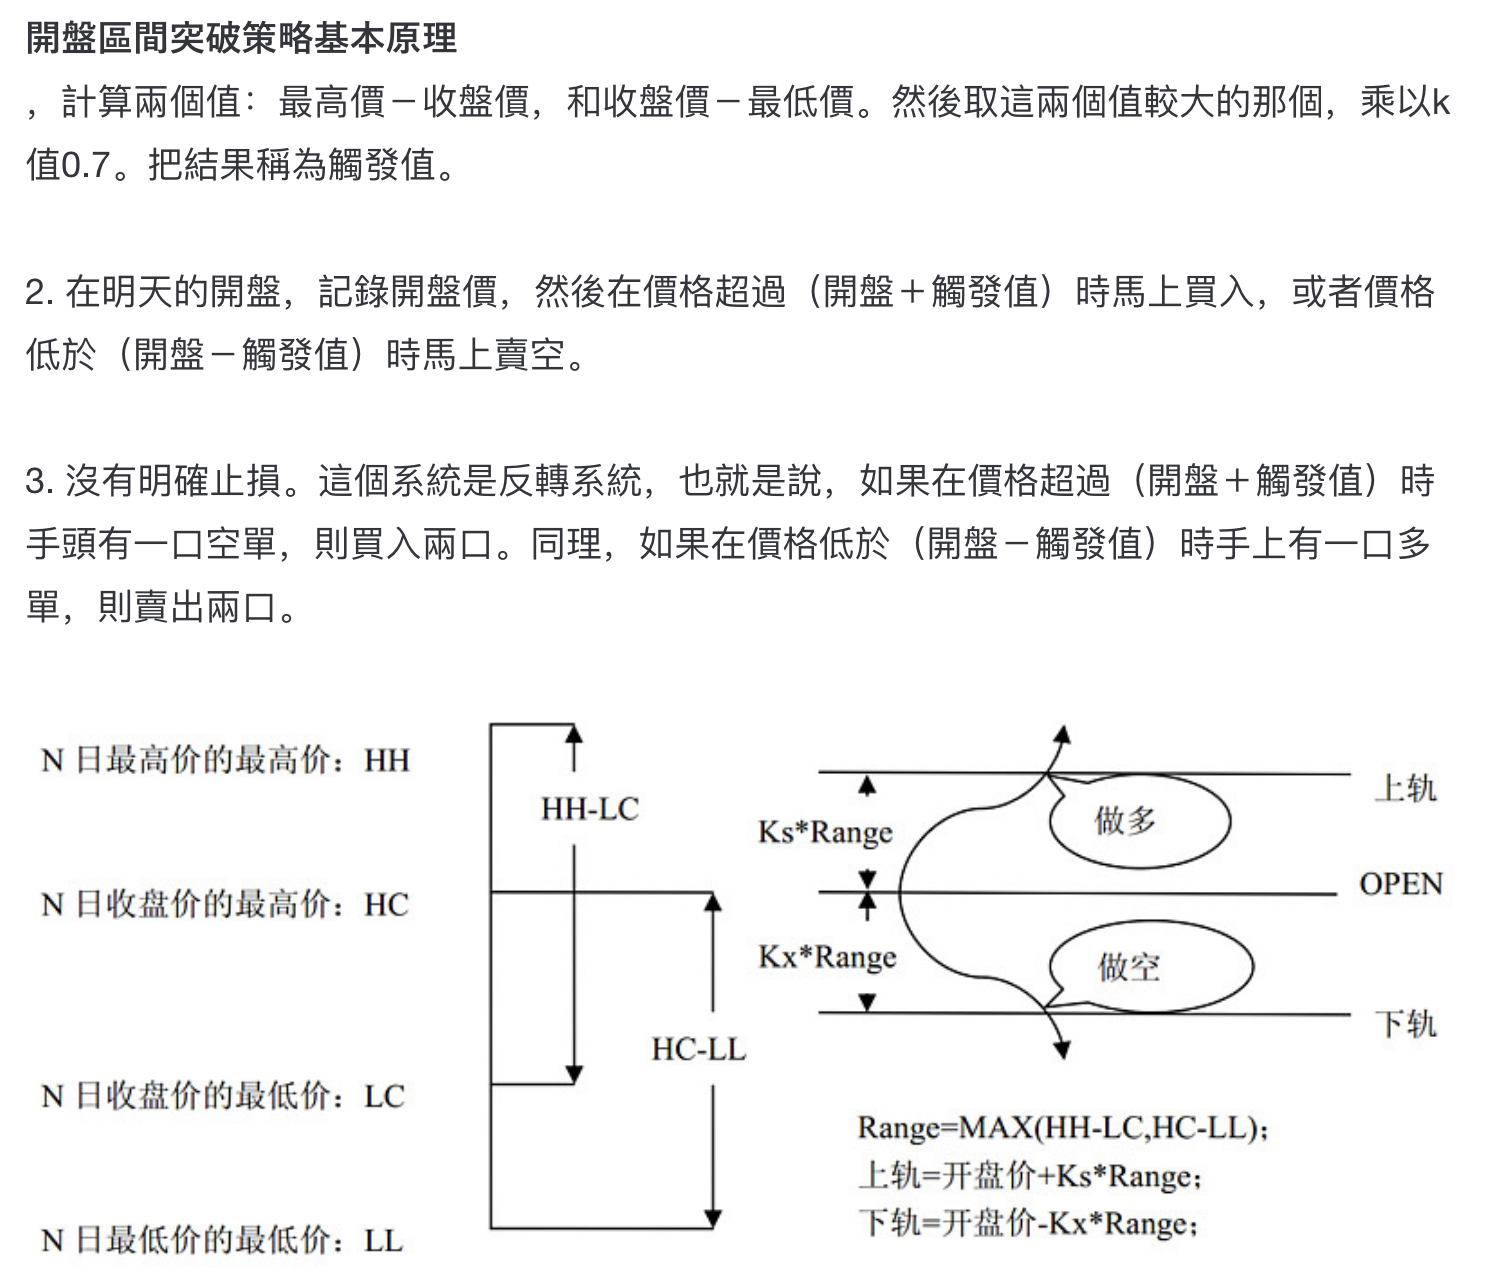

In [141]:
# implementing dual thrust with stop-loss and target-price 
# period, k1, k2 are three parameters to be tuned 
period = 5
k1 = 0.7 
k2 = 0.7 
HIGH = price['high']
CLOSE = price['close']
LOW = price['low']
HH = HIGH.rolling(period).max().shift()
LC = CLOSE.rolling(period).min().shift()
HC = CLOSE.rolling(period).max().shift()
LL = LOW.rolling(period).min().shift()
price['HHLC'] = HH - LC
price['HCLL'] = HC - LL 

price['range'] = price[['HHLC', 'HCLL']].values.max(1)
price['upper'] = price['open'] + k1 * price['range']
price['lower'] = price['open'] - k2 * price['range']

In [ ]:
price.tail()

,startTime,open,high,low,close,volume,HHLC,HCLL,range,upper,lower
1495,2021-08-25T00:45:00+00:00,47956.0,48096.0,47927.0,48013.0,9.172794e+05,472.0,363.0,472.0,48286.4,47625.6
1496,2021-08-25T01:00:00+00:00,48013.0,48013.0,47723.0,47815.0,3.653965e+05,447.0,419.0,447.0,48325.9,47700.1
1497,2021-08-25T01:15:00+00:00,47815.0,47910.0,47753.0,47820.0,1.301165e+06,306.0,360.0,360.0,48067.0,47563.0
1498,2021-08-25T01:30:00+00:00,47820.0,48037.0,47799.0,48029.0,5.235159e+05,306.0,290.0,306.0,48034.2,47605.8
1499,2021-08-25T01:45:00+00:00,48029.0,48037.0,48008.0,48037.0,7.197135e+04,281.0,306.0,306.0,48243.2,47814.8


In [142]:
# implementing dual thrust with stop-loss and target-price 
# period, k1, k2 are three parameters to be tuned 
period = 5 # to be semi-tuned
k1 = 0.7 # to be tuned
k2 = 0.7 # to be tuned 
HIGH = price['high']
CLOSE = price['close']
LOW = price['low']
HH = HIGH.rolling(period).max().shift()
LC = CLOSE.rolling(period).min().shift()
HC = CLOSE.rolling(period).max().shift()
LL = LOW.rolling(period).min().shift()
price['HHLC'] = HH - LC
price['HCLL'] = HC - LL 

price['range'] = price[['HHLC', 'HCLL']].values.max(1)
price['upper'] = price['open'] + k1 * price['range']
price['lower'] = price['open'] - k2 * price['range']

用 iterrows 來跑回測過程

In [143]:
# initialize
position = 0
buy_orders = []
sell_orders = []
target_price = .0
stop_loss = .0
nav = 100000
tp_ratio = 0.04 # to be tuned 
sl_ratio = 0.02 # to be tuned 
last_cal_price = 0
daily_pnl = []
hit_target,hit_stop = False, False
last_traded_price = 0 
commission = []

# 紀錄買賣log
def making_buy_order(buy_price,time,side):
    buy_orders.append({'price':buy_price,'time':time,'side':side})
    print('making '+side+' order @{}'.format(buy_price))
    

def making_sell_order(sell_price,time,side):
    sell_orders.append({'price':sell_price,'time':time,'side':side})
    print('making '+side+' order @{}'.format(sell_price))

for index,value in price[:].iterrows():
    print('回測進行至第 {} 個時段,倉位為 {} 顆'.format(index+1,position))   
    pnl = position * (value['open'] - last_cal_price) # 計算不精確？計算pnl的時候可能還沒真正持倉
    last_cal_price = value['open'] #現在寫法等於是用今天的open - 昨天open 根據昨天position(持倉一天)來算報酬 好像沒啥問題
    hit_target,hit_loss = False, False
    position_prev = position
    #check buy 
    if value['high'] > value['upper']: # 價格有打到上緣
        if position == 0: # 沒有倉位 直接做多1單
            making_buy_order(value['upper'],value['startTime'],'buy')
            position += 1
        elif position == -1: # position == -1 反轉就反手做多
            making_buy_order(value['upper'],value['startTime'],'buy')
            making_buy_order(value['upper'],value['startTime'],'buy')
            position += 2

        target_price = value['upper'] * (1 + tp_ratio)
        stop_loss = value['lower'] * (1 - sl_ratio)
        last_cal_price = value['upper']
        
        # continue 

    #check sell
    if value['low'] < value['lower']: # 價格有打到下緣
        if position == 0:
            making_sell_order(value['lower'],value['startTime'],'sell')
            position -= 1
        elif position == 1: # position == -1 反轉
            making_sell_order(value['lower'],value['startTime'],'sell')
            making_sell_order(value['lower'],value['startTime'],'sell')
            position -= 2
        target_price = value['lower'] * (1 - tp_ratio)
        stop_loss = value['upper'] * (1 + sl_ratio)
        last_cal_price = value['lower']
        
        # continue 
    
     
    # # check target price & stop loss
    if position > 0: #做多狀態
        if value['high'] > target_price: # 止盈
            making_sell_order(target_price,value['startTime'],'take profit')
            position -= 1
            hit_target = True 
            pnl = position * (target_price - last_cal_price)
        elif value['low'] < stop_loss: # 止損
            making_sell_order(stop_loss,value['startTime'],'stop loss')
            position -= 1
            hit_stop = True
    elif position < 0: #做空狀態
        if value['low'] < target_price: # 止盈
            making_buy_order(target_price,value['startTime'],'take profit')
            position += 1
            hit_target = True
        elif value['high'] > stop_loss: # 止損
            making_buy_order(stop_loss,value['startTime'],'stop loss')
            position += 1
            hit_stop = True


    if hit_target:
        pnl = position_prev * (target_price - last_cal_price) # position 這時候已經變了
    if hit_stop:
        pnl = position_prev * (stop_loss - last_cal_price)
    daily_pnl.append(pnl)
    commission.append(abs(position - position_prev)*(last_cal_price)* 0.0007)
    
    print('-'*30)

回測進行至第 1 個時段,倉位為 0 顆
------------------------------
回測進行至第 2 個時段,倉位為 0 顆
------------------------------
回測進行至第 3 個時段,倉位為 0 顆
------------------------------
回測進行至第 4 個時段,倉位為 0 顆
------------------------------
回測進行至第 5 個時段,倉位為 0 顆
------------------------------
回測進行至第 6 個時段,倉位為 0 顆
------------------------------
回測進行至第 7 個時段,倉位為 0 顆
------------------------------
回測進行至第 8 個時段,倉位為 0 顆
------------------------------
回測進行至第 9 個時段,倉位為 0 顆
------------------------------
回測進行至第 10 個時段,倉位為 0 顆
------------------------------
回測進行至第 11 個時段,倉位為 0 顆
------------------------------
回測進行至第 12 個時段,倉位為 0 顆
making sell order @45578.8
------------------------------
回測進行至第 13 個時段,倉位為 -1 顆
making buy order @45811.8
making buy order @45811.8
------------------------------
回測進行至第 14 個時段,倉位為 1 顆
------------------------------
回測進行至第 15 個時段,倉位為 1 顆
------------------------------
回測進行至第 16 個時段,倉位為 1 顆
------------------------------
回測進行至第 17 個時段,倉位為 1 顆
------------------------------
回測進行至第 18 個時段,倉位為 1 顆
------

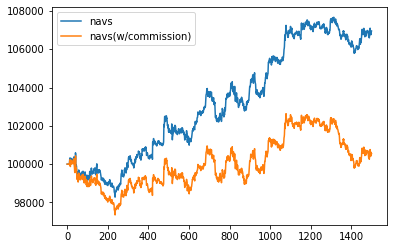

In [144]:
import matplotlib.pyplot as plt
navs = pd.Series(daily_pnl).cumsum() + nav
commission = pd.Series(commission)
navs.plot(label = 'navs')
navs_commission = navs - commission.cumsum()
navs_commission.plot(label = 'navs(w/commission)')
plt.legend()
plt.show()

In [27]:
profits = []
commission = .0
for i in range(len(sell_orders)):
    bp = buy_orders[i]['price']
    sp = sell_orders[i]['price']
    profit = sp-bp
    profits.append(profit)
    # 考慮手續費
    commission += (bp+sp)*0.0007 # FTX taker 手續費


print(sum(profits))
print(commission)
print(sum(profits)-commission)

7961.399999999994
6774.774299999997
1186.6256999999969


## 先模組化 方便之後暴力搜索

比較重點：用 navs-commission 去找夏普指數最高的？或是絕對報酬最高的

參數：period, k1, k2, tp_ratio, sl_ratio, 資料長度（目前只有大概二至三週）

In [8]:
# 模組化
def making_buy_order(buy_price,time,side):
    buy_orders.append({'price':buy_price,'time':time,'side':side})
    
    

def making_sell_order(sell_price,time,side):
    sell_orders.append({'price':sell_price,'time':time,'side':side})
    

def CTA_backtesting(price,params):
    # intialize 
    period = params['period'] # to be semi-tuned
    k1 = params['k1'] # to be tuned
    k2 = params['k2'] # to be tuned

    HIGH = price['high']
    CLOSE = price['close']
    LOW = price['low']
    HH = HIGH.rolling(period).max().shift()
    LC = CLOSE.rolling(period).min().shift()
    HC = CLOSE.rolling(period).max().shift()
    LL = LOW.rolling(period).min().shift()
    price['HHLC'] = HH - LC
    price['HCLL'] = HC - LL 

    price['range'] = price[['HHLC', 'HCLL']].values.max(1)
    price['upper'] = price['open'] + k1 * price['range']
    price['lower'] = price['open'] - k2 * price['range']

    position = 0
    buy_orders = []
    sell_orders = []
    target_price = .0
    stop_loss = .0
    nav = 100000
    tp_ratio = params['tp_ratio'] # to be tuned 
    sl_ratio = params['sl_ratio'] # to be tuned 
    last_cal_price = 0
    daily_pnl = []
    hit_target,hit_stop = False, False
    last_traded_price = 0 
    commission = []

    # print(params)

    for index,value in (price.iterrows()):
        # print('回測進行至第 {} 個時段,倉位為 {} 顆'.format(index+1,position))   
        pnl = position * (value['open'] - last_cal_price) # 計算不精確？計算pnl的時候可能還沒真正持倉
        last_cal_price = value['open'] #現在寫法等於是用今天的open - 昨天open 根據昨天position(持倉一天)來算報酬 好像沒啥問題
        hit_target,hit_loss = False, False
        position_prev = position
        #check buy 
        if value['high'] > value['upper']: # 價格有打到上緣
            if position == 0: # 沒有倉位 直接做多1單
                making_buy_order(value['upper'],value['startTime'],'buy')
                position += 1
            elif position == -1: # position == -1 反轉就反手做多
                making_buy_order(value['upper'],value['startTime'],'buy')
                making_buy_order(value['upper'],value['startTime'],'buy')
                position += 2

            target_price = value['upper'] * (1 + tp_ratio)
            stop_loss = value['lower'] * (1 - sl_ratio)
            last_cal_price = value['upper']
            
            # continue 

        #check sell
        if value['low'] < value['lower']: # 價格有打到下緣
            if position == 0:
                making_sell_order(value['lower'],value['startTime'],'sell')
                position -= 1
            elif position == 1: # position == -1 反轉
                making_sell_order(value['lower'],value['startTime'],'sell')
                making_sell_order(value['lower'],value['startTime'],'sell')
                position -= 2
            target_price = value['lower'] * (1 - tp_ratio)
            stop_loss = value['upper'] * (1 + sl_ratio)
            last_cal_price = value['lower']
            
            # continue 
        
        
        # # check target price & stop loss
        if position > 0: #做多狀態
            if value['high'] > target_price: # 止盈
                making_sell_order(target_price,value['startTime'],'take profit')
                position -= 1
                hit_target = True 
                pnl = position * (target_price - last_cal_price)
            elif value['low'] < stop_loss: # 止損
                making_sell_order(stop_loss,value['startTime'],'stop loss')
                position -= 1
                hit_stop = True
        elif position < 0: #做空狀態
            if value['low'] < target_price: # 止盈
                making_buy_order(target_price,value['startTime'],'take profit')
                position += 1
                hit_target = True
            elif value['high'] > stop_loss: # 止損
                making_buy_order(stop_loss,value['startTime'],'stop loss')
                position += 1
                hit_stop = True


        if hit_target:
            pnl = position_prev * (target_price - last_cal_price) # position 這時候已經變了
        if hit_stop:
            pnl = position_prev * (stop_loss - last_cal_price)
        daily_pnl.append(pnl)
        commission.append(abs(position - position_prev)*(last_cal_price)* 0.0007)
        
        # print('-'*30)

        # end-output 
    navs = pd.Series(daily_pnl).cumsum() + nav
    commission = pd.Series(commission)
    navs_commission = navs - commission.cumsum() # 回傳navs-commission 

    return navs_commission

暴力搜索參數部分

In [152]:
# save total_nav
total_navs = {}
# build parameters dict  
periods = [5+i for i in range(5)] 
k1s = [round(0.1*i,2) for i in range(1,10,2)] 
k2s = [round(0.1*i,2) for i in range(1,10,2)]
tp_ratios = [0.01*i for i in range(1,11,2)]
sl_ratios = [0.01*i for i in range(1,11,2)]

for period in tqdm(periods):
    for k1 in k1s:
        for k2 in k2s:
            for tp_ratio in tp_ratios:
                for sl_ratio in sl_ratios:
                    params = {'period':period,
                              'k1':k1,
                              'k2':k2,
                              'tp_ratio':tp_ratio,
                              'sl_ratio':sl_ratio 
                              }
                    
                    total_navs[tuple(sorted(params.items()))] = CTA_backtesting(price,params).iloc[-1]
                    print(tuple(sorted(params.items())),total_navs[tuple(sorted(params.items()))])
                    

  0%|          | 0/5 [00:00<?, ?it/s]

(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.01), ('tp_ratio', 0.01)) -74518.59815000033
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.03), ('tp_ratio', 0.01)) 81407.13974000006
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.05), ('tp_ratio', 0.01)) 81407.13974000006
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.07), ('tp_ratio', 0.01)) 81407.13974000006
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.09), ('tp_ratio', 0.01)) 81407.13974000006
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.01), ('tp_ratio', 0.03)) -73295.7077900003
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.03), ('tp_ratio', 0.03)) 89393.83610000007
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.05), ('tp_ratio', 0.03)) 89393.83610000007
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.07), ('tp_ratio', 0.03)) 89393.83610000007
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.09), ('tp_ratio', 0.03)) 89393.83610000007

 20%|██        | 1/5 [02:01<08:07, 121.97s/it]

(('k1', 0.9), ('k2', 0.9), ('period', 5), ('sl_ratio', 0.09), ('tp_ratio', 0.09)) 101399.11516000002
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.01), ('tp_ratio', 0.01)) -66832.95539000006
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.03), ('tp_ratio', 0.01)) 75144.62603000013
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.05), ('tp_ratio', 0.01)) 75144.62603000013
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.07), ('tp_ratio', 0.01)) 75144.62603000013
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.09), ('tp_ratio', 0.01)) 75144.62603000013
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.01), ('tp_ratio', 0.03)) -64192.99954000004
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.03), ('tp_ratio', 0.03)) 83407.29388000016
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.05), ('tp_ratio', 0.03)) 83407.29388000016
(('k1', 0.1), ('k2', 0.1), ('period', 6), ('sl_ratio', 0.07), ('tp_ratio', 0.03)) 83407.293880000

 40%|████      | 2/5 [04:03<06:04, 121.45s/it]

(('k1', 0.9), ('k2', 0.9), ('period', 6), ('sl_ratio', 0.07), ('tp_ratio', 0.09)) 105441.40148999996
(('k1', 0.9), ('k2', 0.9), ('period', 6), ('sl_ratio', 0.09), ('tp_ratio', 0.09)) 105441.40148999996
(('k1', 0.1), ('k2', 0.1), ('period', 7), ('sl_ratio', 0.01), ('tp_ratio', 0.01)) -60408.42997000009
(('k1', 0.1), ('k2', 0.1), ('period', 7), ('sl_ratio', 0.03), ('tp_ratio', 0.01)) 72771.27172000008
(('k1', 0.1), ('k2', 0.1), ('period', 7), ('sl_ratio', 0.05), ('tp_ratio', 0.01)) 72771.27172000008
(('k1', 0.1), ('k2', 0.1), ('period', 7), ('sl_ratio', 0.07), ('tp_ratio', 0.01)) 72771.27172000008
(('k1', 0.1), ('k2', 0.1), ('period', 7), ('sl_ratio', 0.09), ('tp_ratio', 0.01)) 72771.27172000008
(('k1', 0.1), ('k2', 0.1), ('period', 7), ('sl_ratio', 0.01), ('tp_ratio', 0.03)) -58490.428570000106
(('k1', 0.1), ('k2', 0.1), ('period', 7), ('sl_ratio', 0.03), ('tp_ratio', 0.03)) 81553.5521200001
(('k1', 0.1), ('k2', 0.1), ('period', 7), ('sl_ratio', 0.05), ('tp_ratio', 0.03)) 81553.55212000

 60%|██████    | 3/5 [06:03<04:01, 120.85s/it]

(('k1', 0.9), ('k2', 0.9), ('period', 7), ('sl_ratio', 0.09), ('tp_ratio', 0.09)) 98326.40453999999
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.01), ('tp_ratio', 0.01)) -55678.223409999875
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.03), ('tp_ratio', 0.01)) 70321.7192800001
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.05), ('tp_ratio', 0.01)) 70321.7192800001
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.07), ('tp_ratio', 0.01)) 70321.7192800001
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.09), ('tp_ratio', 0.01)) 70321.7192800001
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.01), ('tp_ratio', 0.03)) -53156.737169999884
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.03), ('tp_ratio', 0.03)) 78382.57852000013
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.05), ('tp_ratio', 0.03)) 78382.57852000013
(('k1', 0.1), ('k2', 0.1), ('period', 8), ('sl_ratio', 0.07), ('tp_ratio', 0.03)) 78382.57852000013


 80%|████████  | 4/5 [08:02<02:00, 120.40s/it]

(('k1', 0.9), ('k2', 0.9), ('period', 8), ('sl_ratio', 0.07), ('tp_ratio', 0.09)) 100570.69666
(('k1', 0.9), ('k2', 0.9), ('period', 8), ('sl_ratio', 0.09), ('tp_ratio', 0.09)) 100570.69666
(('k1', 0.1), ('k2', 0.1), ('period', 9), ('sl_ratio', 0.01), ('tp_ratio', 0.01)) -40092.10522000009
(('k1', 0.1), ('k2', 0.1), ('period', 9), ('sl_ratio', 0.03), ('tp_ratio', 0.01)) 67219.55447000015
(('k1', 0.1), ('k2', 0.1), ('period', 9), ('sl_ratio', 0.05), ('tp_ratio', 0.01)) 67219.55447000015
(('k1', 0.1), ('k2', 0.1), ('period', 9), ('sl_ratio', 0.07), ('tp_ratio', 0.01)) 67219.55447000015
(('k1', 0.1), ('k2', 0.1), ('period', 9), ('sl_ratio', 0.09), ('tp_ratio', 0.01)) 67219.55447000015
(('k1', 0.1), ('k2', 0.1), ('period', 9), ('sl_ratio', 0.01), ('tp_ratio', 0.03)) -37569.0424700001
(('k1', 0.1), ('k2', 0.1), ('period', 9), ('sl_ratio', 0.03), ('tp_ratio', 0.03)) 75252.43322000014
(('k1', 0.1), ('k2', 0.1), ('period', 9), ('sl_ratio', 0.05), ('tp_ratio', 0.03)) 75252.43322000014
(('k1', 0

100%|██████████| 5/5 [10:01<00:00, 120.40s/it]

(('k1', 0.9), ('k2', 0.9), ('period', 9), ('sl_ratio', 0.07), ('tp_ratio', 0.09)) 96366.84629999999
(('k1', 0.9), ('k2', 0.9), ('period', 9), ('sl_ratio', 0.09), ('tp_ratio', 0.09)) 96366.84629999999


In [154]:
max(total_navs.values())

105441.40148999996


測試報價改成 yfinance （時間較久，為兩個月的15min candle)表現如何




In [ ]:

# save total_nav
total_navs = {}
# build parameters dict  
periods = [5+i for i in range(5)] 
k1s = [round(0.1*i,2) for i in range(1,10,2)] 
k2s = [round(0.1*i,2) for i in range(1,10,2)]
tp_ratios = [0.01*i for i in range(1,11,2)]
sl_ratios = [0.01*i for i in range(1,11,2)]

for period in tqdm(periods):
    for k1 in k1s:
        for k2 in k2s:
            for tp_ratio in tp_ratios:
                for sl_ratio in sl_ratios:
                    params = {'period':period,
                              'k1':k1,
                              'k2':k2,
                              'tp_ratio':tp_ratio,
                              'sl_ratio':sl_ratio 
                              }
                    
                    total_navs[tuple(sorted(params.items()))] = CTA_backtesting(price,params).iloc[-1]
                    print(tuple(sorted(params.items())),total_navs[tuple(sorted(params.items()))])
                    

In [164]:
yf_price = BTC.history(period='60d',interval='15m')
yf_price.columns = [column.lower() for column in yf_price.columns]
yf_price['startTime'] = yf_price.index
total_navs_yf = {}

periods = [5+i for i in range(5)] 
k1s = [round(0.1*i,2) for i in range(1,10,2)] 
k2s = [round(0.1*i,2) for i in range(1,10,2)]
tp_ratios = [0.01*i for i in range(1,11,2)]
sl_ratios = [0.01*i for i in range(1,11,2)]

for period in (periods):
    for k1 in k1s:
        for k2 in k2s:
            for tp_ratio in tp_ratios:
                for sl_ratio in sl_ratios:
                    params = {'period':period,
                              'k1':k1,
                              'k2':k2,
                              'tp_ratio':tp_ratio,
                              'sl_ratio':sl_ratio 
                              }
                    
                    total_navs_yf[tuple(sorted(params.items()))] = CTA_backtesting(yf_price,params).iloc[-1]
                    print(tuple(sorted(params.items())),total_navs[tuple(sorted(params.items()))])
                    

(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.01), ('tp_ratio', 0.01)) -74518.59815000033
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.03), ('tp_ratio', 0.01)) 81407.13974000006
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.05), ('tp_ratio', 0.01)) 81407.13974000006
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.07), ('tp_ratio', 0.01)) 81407.13974000006
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.09), ('tp_ratio', 0.01)) 81407.13974000006
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.01), ('tp_ratio', 0.03)) -73295.7077900003
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.03), ('tp_ratio', 0.03)) 89393.83610000007
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.05), ('tp_ratio', 0.03)) 89393.83610000007
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.07), ('tp_ratio', 0.03)) 89393.83610000007
(('k1', 0.1), ('k2', 0.1), ('period', 5), ('sl_ratio', 0.09), ('tp_ratio', 0.03)) 89393.83610000007

In [169]:
max(total_navs.values())

105441.40148999996

In [170]:
max(total_navs_yf.values())

139646.0100250784

In [175]:
sorted_total_navs = sorted(total_navs.items(), key=lambda kv: kv[1],reverse=True)

In [176]:
sorted_total_navs[:30]

[((('k1', 0.9),
   ('k2', 0.9),
   ('period', 6),
   ('sl_ratio', 0.03),
   ('tp_ratio', 0.05)),
  105441.40148999996),
 ((('k1', 0.9),
   ('k2', 0.9),
   ('period', 6),
   ('sl_ratio', 0.05),
   ('tp_ratio', 0.05)),
  105441.40148999996),
 ((('k1', 0.9),
   ('k2', 0.9),
   ('period', 6),
   ('sl_ratio', 0.07),
   ('tp_ratio', 0.05)),
  105441.40148999996),
 ((('k1', 0.9),
   ('k2', 0.9),
   ('period', 6),
   ('sl_ratio', 0.09),
   ('tp_ratio', 0.05)),
  105441.40148999996),
 ((('k1', 0.9),
   ('k2', 0.9),
   ('period', 6),
   ('sl_ratio', 0.03),
   ('tp_ratio', 0.07)),
  105441.40148999996),
 ((('k1', 0.9),
   ('k2', 0.9),
   ('period', 6),
   ('sl_ratio', 0.05),
   ('tp_ratio', 0.07)),
  105441.40148999996),
 ((('k1', 0.9),
   ('k2', 0.9),
   ('period', 6),
   ('sl_ratio', 0.07),
   ('tp_ratio', 0.07)),
  105441.40148999996),
 ((('k1', 0.9),
   ('k2', 0.9),
   ('period', 6),
   ('sl_ratio', 0.09),
   ('tp_ratio', 0.07)),
  105441.40148999996),
 ((('k1', 0.9),
   ('k2', 0.9),
   ('per

In [177]:
sorted_total_navs_yf = sorted(total_navs_yf.items(), key=lambda kv: kv[1],reverse=True)

In [178]:
sorted_total_navs_yf[:30]

[((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5),
   ('sl_ratio', 0.03),
   ('tp_ratio', 0.07)),
  139646.0100250784),
 ((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5),
   ('sl_ratio', 0.05),
   ('tp_ratio', 0.07)),
  139646.0100250784),
 ((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5),
   ('sl_ratio', 0.07),
   ('tp_ratio', 0.07)),
  139646.0100250784),
 ((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5),
   ('sl_ratio', 0.09),
   ('tp_ratio', 0.07)),
  139646.0100250784),
 ((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5),
   ('sl_ratio', 0.03),
   ('tp_ratio', 0.09)),
  139646.0100250784),
 ((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5),
   ('sl_ratio', 0.05),
   ('tp_ratio', 0.09)),
  139646.0100250784),
 ((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5),
   ('sl_ratio', 0.07),
   ('tp_ratio', 0.09)),
  139646.0100250784),
 ((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5),
   ('sl_ratio', 0.09),
   ('tp_ratio', 0.09)),
  139646.0100250784),
 ((('k1', 0.1),
   ('k2', 0.1),
   ('period', 5)

In [36]:
yf_price = BTC.history(period='60d',interval='15m')
yf_price.columns = [column.lower() for column in yf_price.columns]
yf_price['startTime'] = yf_price.index
total_navs_yf = {}

In [37]:
# initialize
position = 0
buy_orders = []
sell_orders = []
target_price = .0
stop_loss = .0
nav = 100000
tp_ratio = 0.04 # to be tuned 
sl_ratio = 0.02 # to be tuned 
last_cal_price = 0
daily_pnl = []
hit_target,hit_stop = False, False
last_traded_price = 0 
commission = []

best_params = {'k1':0.1,'k2':0.1,'period':5,'sl_ratio':0.03,'tp_ratio':0.07}
best_nav = CTA_backtesting(yf_price,best_params)

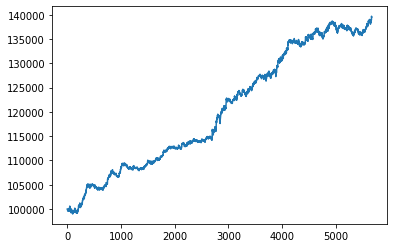

In [38]:
best_nav.plot()

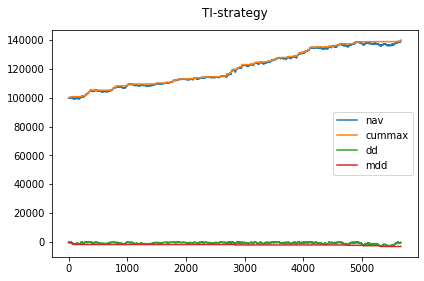

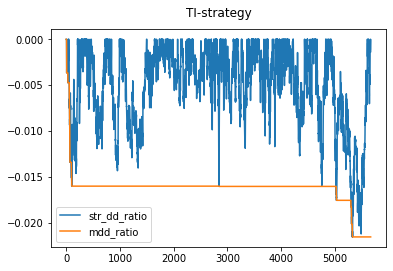

----------------------------------------
ti-strategy mdd= -0.021555559506270416


In [39]:
import matplotlib.pyplot as plt
# 最大回撤
def get_mdd(nav): 
    mdd = 0.
    nav_max = nav.cummax() # 累積最大值
    drawdown = (nav - nav_max) / nav_max # 從上個波峰算每天的回撤比例
    mdd = drawdown.cummin() # drawdown是負值，取cummin找出最小的（絕對值最大）的回撤
    return mdd
    
daily_navs = best_nav
daily_navs.plot()
nav_max = daily_navs.cummax()
nav_max.plot()
dd = daily_navs-nav_max
dd.plot()
mdd = dd.cummin()
mdd.plot()
plt.title("TI-strategy", x=0.5, y=1.03)
plt.legend(['nav', 'cummax', 'dd', 'mdd'])

plt.tight_layout()
plt.show()

dd_ratio = dd/nav_max
dd_ratio.plot()
mdd_ratio = dd_ratio.cummin()
mdd_ratio.plot()
plt.legend(['str_dd_ratio', 'mdd_ratio'])
plt.title("TI-strategy", x=0.5, y=1.03)
plt.show()
print('-'*40)
print('ti-strategy mdd=', min(mdd_ratio))

In [22]:
(yf_price['close'] / yf_price['close'][0] * 100000).plot()
best_nav.plot()
# plt.legend(['a','b'])
# plt.show()

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f6bf0d8be60> (for post_execute):


ValueError: ignored

ValueError: ignored

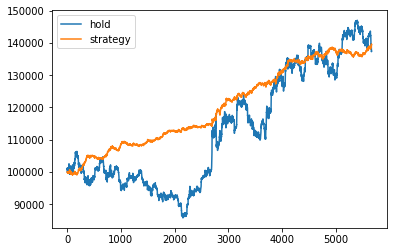

In [40]:
a = pd.DataFrame([list(yf_price['close']/yf_price['close'][0]*100000),list(best_nav)]).T
a.plot()
plt.legend(['hold','strategy'])
plt.show()